In [2]:
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import os

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

import openpyxl
import xlwt

import ipywidgets as widgets

import os
import sys
sys.path.append('../batteryratecap')
import capacity_vs_cycle

ModuleNotFoundError: No module named 'capacity_vs_cycle'

## Case # 1
### Discharge curve &#8594; Capacity rate curve
### E vs Li (<font color=red>V</font>) vs Capacity (<font color=red>Ah cm<sup>-2</sup></font>) &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

### Step 1) Upload and convert potential vs capacity data

In [2]:
def potential_rate(xls_file, sheet_name, paper_num, set_num, c_rate):
    """ 
    This function converts potential vs. capacity data to capacity vs c-rate data
    The Highest x-value (capacity [mAh]) from the charge/discharge graph
    PARAMETERS
    ----------
    1) Excel file (file path) - string
    2) sheetnames - list
    3) Paper # - string
    4) Set # - integer: max number of sets
    5) c_rate - dataframe
    RETURNS
    -------
    Capacity vs c-rate - dataframe
    """
    # Determining which set # and the number of set lists from the excel file
    set_list = ['set #' + str(i) for i in range (1, set_num + 1)]
    # Test that the input 'set_num' is an integer
    assert type(set_num) == int, 'set_num must be an integer'
    # Dataframing the interested potential vs capacity excel sheet
    df = pd.read_excel(xls_file, sheet_name, header = [0,1,2]) #
    # Merging multiple spreadsheets
    df_sheets = []
    for i in sheet_name:
        df_sheets.append(df[i])
    df_merged = pd.concat(df_sheets, axis = 1)
    # Selecting maximum capacity values for each dataset and concatnate with corresponding c-rates or current density
    caplist = []
    for i in set_list:
        set_i = (df_merged[paper_num, i])
        set_i_max = set_i["Capacity (mAh/g)"].max(axis=0).array
        caplist.append(c_rate)
        caplist.append(pd.DataFrame({"Capacity (mAh/g)": set_i_max}))
    df_cap_rate = pd.concat(caplist, axis = 1)
    # Test that the output is a dataframe
    assert type(c_rate) == type(df_cap_rate), 'The output must be a dataframe'
    return df_cap_rate

In [3]:
file_path = '~/capstone_spring_2021/3DLi-ionbattery/liibattery3d/data/liibattery3d_performancelog.xls'
sheet_name = ['1_Discharge (Cover2)', '1_Discharge (1C)', '1_Discharge (2C)', '1_Discharge (5C)']
rates = { "C rate": [0.5, 1.0, 2.0, 5.0]}
c_rate = pd.DataFrame(rates)
df_cap_rate = potential_rate(file_path, sheet_name, 'Paper # 32', 3, c_rate)
df_cap_rate

FileNotFoundError: [Errno 2] No such file or directory: '/home/kev/capstone_spring_2021/3DLi-ionbattery/liibattery3d/data/liibattery3d_performancelog.xls'

### Step 2) Export the new dataframe to an existing excel file

In [ ]:
def excel_merge(dataframe, xls_file, sheetname):
    """
    This function adds the converted dataframe to an existing excel file
    PARAMETERS
    ----------
    1) converted dataframe - dataframe
    2) Excel file (file path) - string
    3) sheetname - string
    RETURNS
    -------
    A new sheet of the convereted data in the excel file
    """
    # Exporting the converted dataframe to an excel file
    dataframe.to_excel(xls_file, sheet_name = sheetname, index=False, header=True)
    # Test that the sheet name is a string
    assert type(sheetname) == str, 'sheetname must be a string'
    print('saved succesfully to' + xls_file)
    return

In [ ]:
file_path_temp = '~/capstone_spring_2021/3DLi-ionbattery/Demo/Excelfile_ex.xls'
excel_merge(df_cap_rate, file_path_temp, 'Capacity_Rate')

## Case # 2
### Rate test data &#8594; Capacity rate curve
### Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs Cycle #  &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

###### Loading in excel files

In [4]:
battery_performance = pd.read_excel('NEW_3D_Battery_Performance_Log.xls', sheet_name = None, header=[0, 1, 2])
battery_performance_sheet_names = pd.ExcelFile('NEW_3D_Battery_Performance_Log.xls').sheet_names

###### Creating a different df for each excel sheet in the file

In [5]:
for i, j in enumerate(battery_performance_sheet_names):
    globals()[f'battery_performance_{j}'] = battery_performance[battery_performance_sheet_names[i]]

###### Previewing the dataframe

In [6]:
battery_performance_4_CapacityCycle.head(7)

paper1                     paper2                             \
      set1E                      set1E                      set2E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle #   
0  0.185615       122.911465  1.021898       249.145299  0.948905   
1  1.670534       127.179225  1.897810       197.863248  2.043796   
2  2.969838       119.497258  3.065693       199.572650  2.992701   
3  3.897912       110.961740  4.014599       214.957265  3.868613   
4  5.011601       109.681412  4.963504       261.965812  4.963504   
5  6.125290       110.108188  5.912409       331.196581  5.985401   
6  6.867749       110.961740  6.715328       329.487179  6.934307   

                                                                          ...  \
                       set3E                      set4E                   ...   
  Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)  ...   
0       150.000000  0.912162        70.588235  0.979730        84.873950  ...   
1       129.487179  1.925676        36.554622  1.858108        40.336134  ...   
2       124.358974  3.006757        35.714286  2.939189        42.016807  ...   
3       127.777778  3.885135        35.714286  4.020270        43.277311  ...   
4       130.341880  4.898649        35.294118  4.898649        40.336134  ...   
5       130.341880  5.912162        35.294118  5.979730        50.000000  ...   
6       173.931624  7.060811        40.756303  6.993243        47.058824  ...   

    paper29                    paper32                              \
      set1E                      set1E                       set2E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)    Cycle #   
0  1.008547       117.083333  0.970927       173.078008  12.054231   
1  2.017094        96.250000  2.000792       159.745980  13.035055   
2  3.008547       101.805556  3.030656       157.778195  14.064919   
3  4.034188       104.583333  3.962438       157.708333  15.045742   
4  4.991453       105.972222  5.074038       156.485746  19.067118   
5  6.000000       108.194444  6.022167       154.448099  20.096983   
6  7.008547       108.472222  7.002991       153.516604  21.077806   

                                                                            
                       set3E                                                
  Capacity (mAh/g)   Cycle # Capacity (mAh/g) Cycle #.1 Capacity (mAh/g).1  
0       135.951262  0.970927       158.406955       NaN                NaN  
1       135.402345  2.000792       149.848841       NaN                NaN  
2       135.527099  2.981615       148.800909       NaN                NaN  
3       135.585317  3.962438       148.509816       NaN                NaN  
4       116.547880  4.992303       147.857769       NaN                NaN  
5       116.190252  6.022167       144.026995       NaN                NaN  
6        73.075322  7.002991       142.746188       NaN                NaN  

[7 rows x 30 columns]

###### 

###### Get the paper and set index for each pair of data in the df

In [7]:
papers = np.array(battery_performance_4_CapacityCycle.columns.get_level_values(0))
papers = papers[0:-1:2]
    
sets = np.array(battery_performance_4_CapacityCycle.columns.get_level_values(1))
sets = sets[0:-1:2]

###### Creating seperate numpy arrays of each pair of data with the name of the variable as the paper and set ID

In [8]:
# Initialize list of all paperX_setX which can be saved as the input for the ipywidget below
list_of_papers_sets = []


for i,j in zip(papers,sets):

        
    globals()[f'capacity_{i}_{j}'] = np.array(battery_performance_4_CapacityCycle[i][j])
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'][~np.isnan(globals()[f'capacity_{i}_{j}'])]
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'].reshape(-1,2)
    
    # Keep track of list of unique paper/set 
    list_of_papers_sets.append(f'capacity_{i}_{j}')

In [9]:
list_of_papers_sets

['capacity_paper1_set1E',
 'capacity_paper2_set1E',
 'capacity_paper2_set2E',
 'capacity_paper2_set3E',
 'capacity_paper2_set4E',
 'capacity_paper3_set1E',
 'capacity_paper4_set1E',
 'capacity_paper4_set2E',
 'capacity_paper4_set3E',
 'capacity_paper19_set1E',
 'capacity_paper29_set1E',
 'capacity_paper32_set1E',
 'capacity_paper32_set2E',
 'capacity_paper32_set3E',
 'capacity_paper32_set3E']

###### Select ONE paper and run the cell. If you want to see a different paper/set, re-run the cell starting below

In [10]:
user_selected_paper = widgets.SelectMultiple(
    options=list_of_papers_sets,
    #value = ,
    rows=10,
    description='Select paper',
    disabled=False
)

In [14]:
#### NOTE: Run this cell, then select ONE option and run the cell again and make sure your selection is correctly output below
#### if you wish to select a different paper/set, run the cell above first!
user_selected_paper

SelectMultiple(description='Select paper', index=(0,), options=('capacity_paper1_set1E', 'capacity_paper2_set1…

In [15]:
user_selected_paper = user_selected_paper.value[0]
user_selected_paper

'capacity_paper1_set1E'

In [17]:
user_selected_paper

'capacity_paper1_set1E'

<function matplotlib.pyplot.show(*args, **kw)>

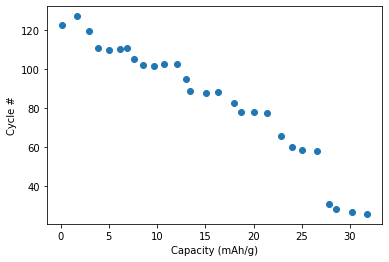

In [18]:
plt.scatter(globals()[user_selected_paper][:,0], globals()[user_selected_paper][:,1])
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Cycle #")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

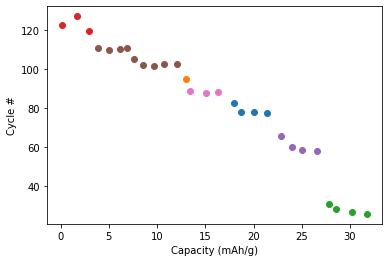

In [19]:
## For different selections of paper/set, the user will have to adjust 'n_components' until the groups
## are properly grouped, as seen in the plot below
model = GaussianMixture(n_components = 7)
model.fit(globals()[user_selected_paper])

## Use the model to make predictions about which group each datapoint belongs to
## predictions stored as an np array with indexes corresponding to points, and values to their assigned class
prediction = model.predict(globals()[user_selected_paper])

## np.array of the unique classes 
clusters = unique(prediction)

## Plot the points now that they are grouped
for cluster in clusters:
    row_ix = where(prediction == cluster)
    plt.scatter(globals()[user_selected_paper][row_ix, 0], globals()[user_selected_paper][row_ix, 1])
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Cycle #")
plt.show

###### Return the means of each group, and properly sort them

In [30]:
means = model.means_
means = means[np.argsort(means[:, 0])]

In [31]:
means

array([[  1.60832916, 123.19558318],
       [  7.83577863, 106.17634252],
       [ 12.99303944,  94.74425453],
       [ 14.91105237,  88.34261832],
       [ 19.53594025,  79.06028484],
       [ 24.59396736,  60.49548731],
       [ 29.60556845,  27.74043488]])

###### Convert the data into current density vs capacity and return as dataframe

In [32]:
means_of_groups = means[:,1]
means_of_groups = pd.DataFrame(means_of_groups)
means_of_groups = means_of_groups.rename(columns={0: "Capacity (mAh/cm²)"})

In [33]:
current_density = np.array([50, 250, 500, 1000, 1500, 2500, 5000])
current_list = pd.DataFrame(current_density)
current_list = current_list.rename(columns={0: "Current Density (µA/cm²)"})

In [34]:
capacity_vs_current_density_df = pd.concat([current_list, means_of_groups], axis = 1)

In [35]:
capacity_vs_current_density_df

,Current Density (µA/cm²),Capacity (mAh/cm²)
0,50,123.195583
1,250,106.176343
2,500,94.744255
3,1000,88.342618
4,1500,79.060285
5,2500,60.495487
6,5000,27.740435
